In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.interpolate import interp1d

from tqdm import tqdm

from gao_sols import *

plt.style.use('science')

In [2]:
ell = 2
roots = np.loadtxt(f'datfiles/roots{ell}.dat', dtype=np.complex128)
Deltas = roots[:, 0].real
nus = roots[:, 1]

deltac = np.array([9.654418e-2, 1.473792e-1, 4.306921e-1, 1.580826, 2.073296])

In [3]:
C6 = 10000
energies = energy(Deltas, C6)

In [4]:
f_nu_real = interp1d(energies, nus.real, kind='cubic')
f_nu_imag = interp1d(energies, nus.imag, kind='cubic')

In [5]:
# Deltasp = np.linspace(0.01, 10, 50)
# energiesp = energy(Deltasp, C6)
# nusp = np.array([f_nu_real(en) + f_nu_imag(en)*1j for en in energiesp])

# ii = np.where(Deltasp < deltac[ell])[0]
# jj = np.where(Deltasp > deltac[ell])[0]

# nusp[ii] = nusp[ii].real
# nusp[jj] = nusp[jj].imag*1j

In [6]:
ii = np.where(roots[:, 0].real < 10)[0]
Deltasp = roots[ii, 0].real
energiesp = energy(Deltasp, C6)
nusp = roots[ii, 1]

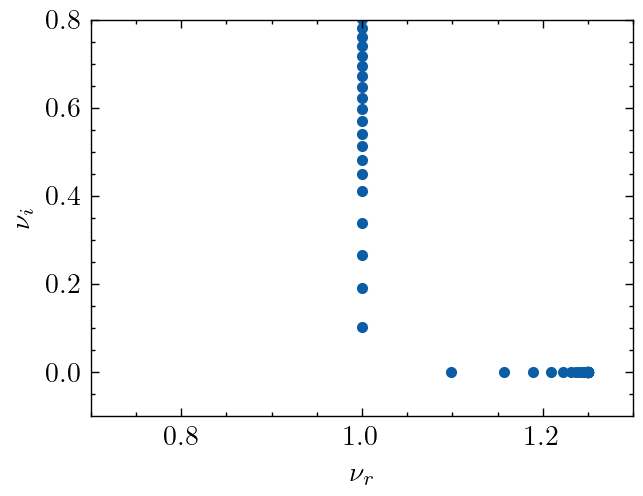

In [7]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

ax.scatter(nusp.real, nusp.imag, marker='.')

ax.set_xlim([0.7, 1.3])
ax.set_ylim([-0.1, 0.8])
ax.set_xlabel(r'$\nu_r$')
ax.set_ylabel(r'$\nu_i$');

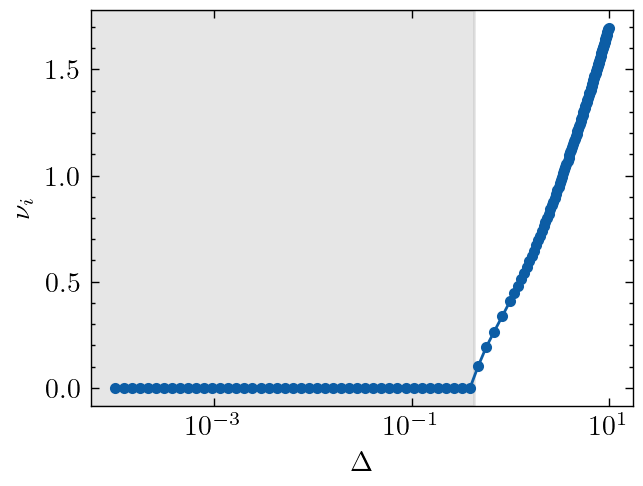

In [8]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

ax.plot(Deltasp, nusp.imag, marker='.')
ax.axvspan(0, deltac[ell], color='C6', alpha=0.25)
ax.set_xscale('log')
ax.set_xlabel(r'$\Delta$')
ax.set_ylabel(r'$\nu_i$');

In [9]:
Zffs = np.array([Zff(en, ell, nu, C6) for (en, nu) in zip(energiesp, nusp)])
Zfgs = np.array([Zfg(en, ell, nu, C6) for (en, nu) in zip(energiesp, nusp)])
Zgfs = np.array([Zgf(en, ell, nu, C6) for (en, nu) in zip(energiesp, nusp)])
Zggs = np.array([Zgg(en, ell, nu, C6) for (en, nu) in zip(energiesp, nusp)])

In [10]:
def Z_prefactor(eps, c6, l, n):
    return 1 / ((X(eps, c6, l, n)**2 + Y(eps, c6, l, n)**2)*np.sin(np.pi*n))


def square_brackets(eps, c6, l, n):
    return alpha(eps, c6, l, n)*np.sin(np.pi*n) - beta(eps, c6, l, n)*np.cos(np.pi*n)


def bracket_left(eps, c6, l, n):
    return (-1)**(l+1) * square_brackets(eps, c6, l, n) * \
        G(-n, l, Delta(eps, c6)) * np.cos(np.pi*n - l*np.pi/2 - np.pi/4)


def bracket_right(eps, c6, l, n):
    return beta(eps, c6, l, n) * G(n, l, Delta(eps, c6)) * \
        np.sin(np.pi*n - l*np.pi/2 - np.pi/4)


def func(eps, c6, l, n):
    return Z_prefactor(eps, c6, l, n) * (bracket_left(eps, c6, l, n) + bracket_right(eps, c6, l, n))

In [11]:
y = np.array([func(en, C6, ell, nu) for (en, nu) in zip(energiesp, nusp)])

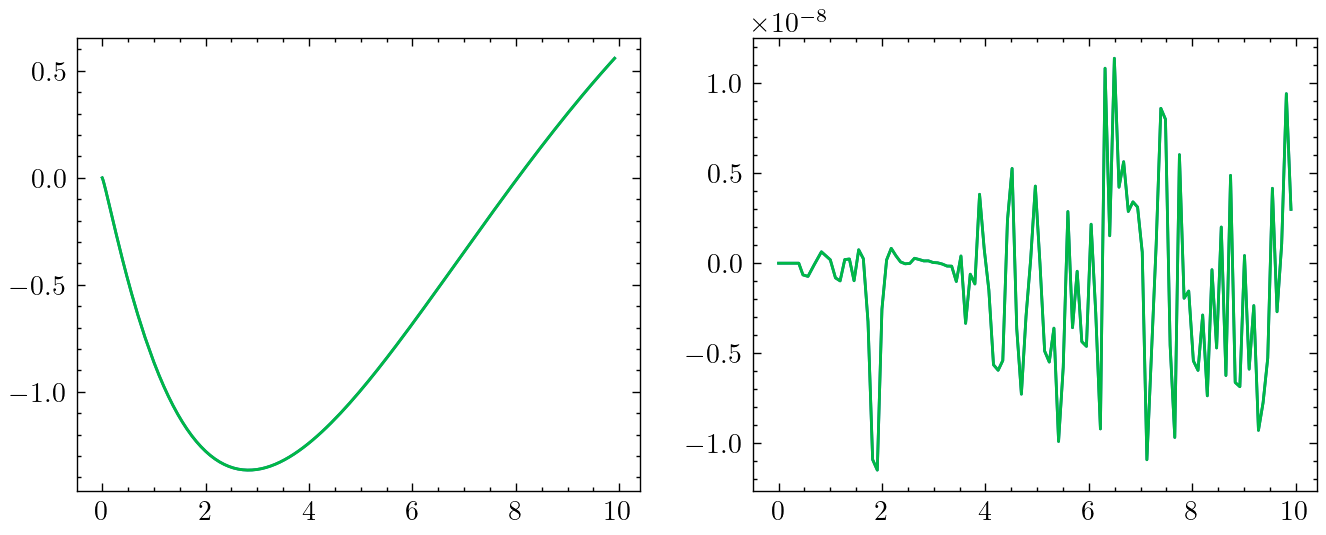

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3), dpi=200)
fig.patch.set_facecolor('white')

ax[0].plot(Deltasp, y.real)
ax[1].plot(Deltasp, y.imag)
ax[0].plot(Deltasp, Zfgs.real)
ax[1].plot(Deltasp, Zfgs.imag);

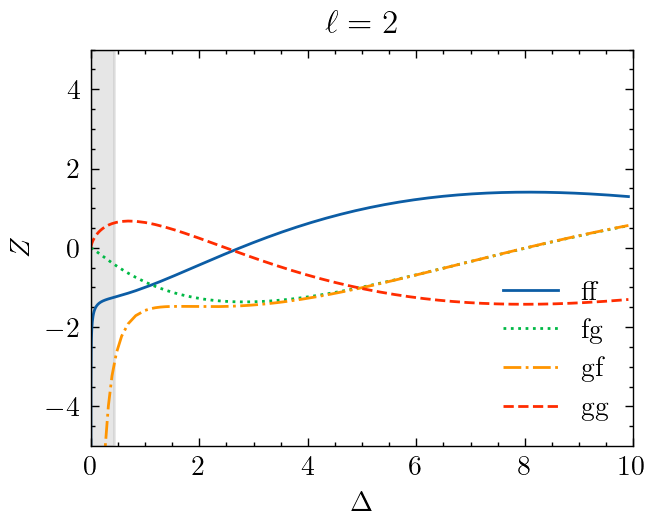

In [14]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

ax.plot(Deltasp, Zffs.real, linestyle='-', label='ff')
ax.plot(Deltasp, Zfgs.real, linestyle='dotted', label='fg')
ax.plot(Deltasp, Zgfs.real, linestyle='-.', label='gf')
ax.plot(Deltasp, Zggs.real, linestyle='dashed', label='gg')

# ax.set_xscale('log')
ax.set_xlim([0, 10])
ax.legend(loc='lower right')
ax.set_ylim([-5, 5])
ax.set_xlabel(r'$\Delta$')
ax.set_ylabel(r'$Z$')
ax.axvspan(0, deltac[ell], color='C6', alpha=0.25)
ax.set_title(r'$\ell=%d$' % (ell));

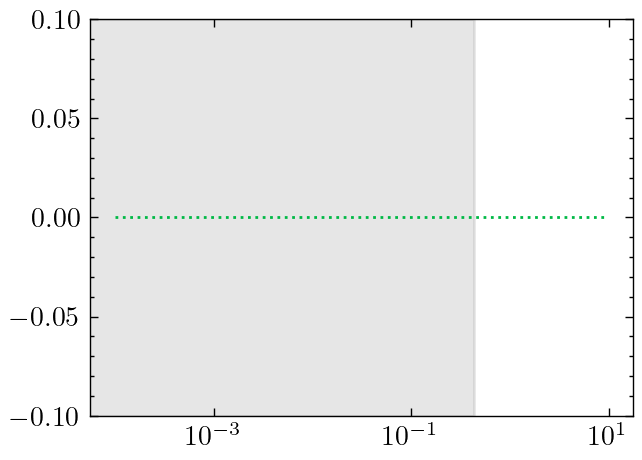

In [16]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

# ax.plot(Deltasp, Zffs.imag, linestyle='-')
ax.plot(Deltasp, Zfgs.imag, linestyle='dotted', color='C1')
# ax.plot(Deltasp, Zgfs.imag, linestyle='-.')
# ax.plot(Deltasp, Zggs.imag, linestyle='dashed')
ax.axvspan(0, deltac[ell], color='C6', alpha=0.25)
ax.set_xscale('log')
ax.set_ylim([-0.1, 0.1]);

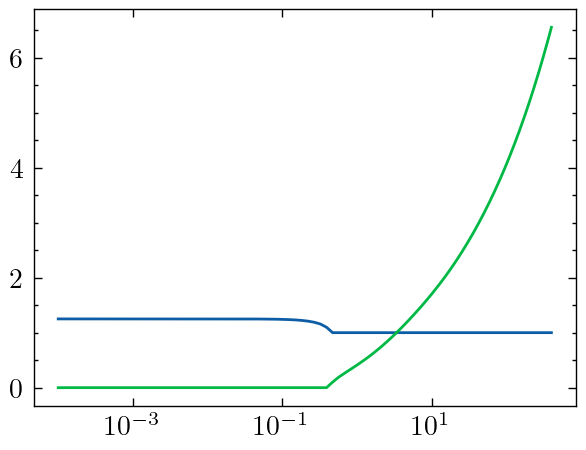

In [17]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

ax.plot(roots[:, 0].real, roots[:, 1].real)
ax.plot(roots[:, 0].real, roots[:, 1].imag)
ax.set_xscale('log')

In [3]:
ell = 0
MAX_ITER = 10000

def eq15(nu, l, delta):
    return (nu**2 - nu0(l)**2) - (delta**2 / nu) * (QbarConv(nu, l, delta) - QbarConv(-nu, l, delta))

In [10]:
def find_nu(l, delta, start):
    root_real = l/2 if l%2==0 else (l-1)/2 + 1
    if delta < deltac[l]:
        z = newton(lambda i: eq15([i, 0], l, delta), start, maxiter=MAX_ITER)
        return z + 0j
    else:
        z = newton(lambda i: eq15([root_real, i], l, delta), start, maxiter=MAX_ITER, tol=1e-6)
        #z = fsolve(lambda i: eq15([rootReal, i[0]], l, delta), [start], factor=1)[0]
        return rootReal + z.real*1j

In [48]:

nd = 50
Deltas = np.linspace(0.01, 0.2, nd)
start = nu0(0)

results = []

for D in tqdm(Deltas):
    try:
        r = findRoot(ell, D, start)
        results.append([D, r])
        start = r
    except:
        print(f'Failed to converge for Delta = {D}.')

 52%|██████████████████████▎                    | 26/50 [00:00<00:00, 47.71it/s]

Failed to converge for Delta = 0.10693877551020407.
Failed to converge for Delta = 0.11081632653061224.
Failed to converge for Delta = 0.11469387755102041.
Failed to converge for Delta = 0.11857142857142856.
Failed to converge for Delta = 0.12244897959183673.


 62%|██████████████████████████▋                | 31/50 [00:03<00:02,  8.08it/s]

Failed to converge for Delta = 0.1263265306122449.
Failed to converge for Delta = 0.13020408163265307.
Failed to converge for Delta = 0.13408163265306122.


 68%|█████████████████████████████▏             | 34/50 [00:04<00:02,  5.49it/s]

Failed to converge for Delta = 0.1379591836734694.
Failed to converge for Delta = 0.14183673469387756.


 72%|██████████████████████████████▉            | 36/50 [00:05<00:03,  4.48it/s]

Failed to converge for Delta = 0.1457142857142857.


 74%|███████████████████████████████▊           | 37/50 [00:06<00:03,  4.05it/s]

Failed to converge for Delta = 0.1495918367346939.


 76%|████████████████████████████████▋          | 38/50 [00:06<00:03,  3.65it/s]

Failed to converge for Delta = 0.15346938775510205.


 78%|█████████████████████████████████▌         | 39/50 [00:07<00:03,  3.28it/s]

Failed to converge for Delta = 0.1573469387755102.


 80%|██████████████████████████████████▍        | 40/50 [00:07<00:03,  2.97it/s]

Failed to converge for Delta = 0.16122448979591839.


 82%|███████████████████████████████████▎       | 41/50 [00:08<00:03,  2.71it/s]

Failed to converge for Delta = 0.16510204081632654.


 84%|████████████████████████████████████       | 42/50 [00:08<00:02,  2.68it/s]

Failed to converge for Delta = 0.1689795918367347.


 86%|████████████████████████████████████▉      | 43/50 [00:08<00:02,  2.47it/s]

Failed to converge for Delta = 0.17285714285714288.


 88%|█████████████████████████████████████▊     | 44/50 [00:09<00:02,  2.32it/s]

Failed to converge for Delta = 0.17673469387755103.


 90%|██████████████████████████████████████▋    | 45/50 [00:09<00:02,  2.21it/s]

Failed to converge for Delta = 0.18061224489795918.


 92%|███████████████████████████████████████▌   | 46/50 [00:10<00:01,  2.14it/s]

Failed to converge for Delta = 0.18448979591836737.


 94%|████████████████████████████████████████▍  | 47/50 [00:10<00:01,  2.08it/s]

Failed to converge for Delta = 0.18836734693877552.


 96%|█████████████████████████████████████████▎ | 48/50 [00:11<00:00,  2.02it/s]

Failed to converge for Delta = 0.19224489795918367.


 98%|██████████████████████████████████████████▏| 49/50 [00:12<00:00,  1.99it/s]

Failed to converge for Delta = 0.19612244897959186.


100%|███████████████████████████████████████████| 50/50 [00:12<00:00,  3.98it/s]

Failed to converge for Delta = 0.2.


In [45]:
len(results)

48

In [46]:
D, r = results[-1]

In [47]:
D, r, eq15(r, ell, D)

(0.0963265306122449, (0.015114329423499268+0j), (-2.498001805406602e-16+0j))